In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [47]:
df = pd.read_csv('./dataset/hungarian.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [49]:
# creating a copy of original dataset
heart = df

In [50]:
columns_with_missing_values = ['trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

for column in columns_with_missing_values:
    heart[column] = heart[column].replace('?', np.nan)


In [51]:
#check for missing value in entire dataframe
heart.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

#### Dimension reduction

In [83]:
# more than 80% data missing for thal column and almost all missing for ca column therefore dropping them
heart.drop(columns=['ca', 'thal'], inplace=True)

#### Correcting the data types of attributes

In [85]:
# Convert specific columns to numeric
numeric_columns = ['trestbps', 'chol', 'thalach', 'oldpeak']

for column in numeric_columns:
    heart[column] = pd.to_numeric(heart[column], errors='coerce')

In [86]:
# Convert specific columns to categorical
categorical_columns = ['sex', 'num','cp','restecg']

for column in categorical_columns:
    heart[column] = heart[column].astype('object')


In [87]:
heart.dtypes

age           int64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
num          object
dtype: object

#### Handle Missing Values:

In [88]:
# First, create a function to fill missing values with the mode based on another column
def fill_with_mode(df, column, groupby_column):
    # Calculate the mode for each group and handle cases with no mode
    mode_by_group = df.groupby(groupby_column)[column].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0])
    df[column] = df[column].fillna(df[groupby_column].map(mode_by_group))

In [89]:
def fill_with_median(df, column, groupby_columns):
    for group in df.groupby(groupby_columns):
        group_filter = (df[groupby_columns] == group[0]).all(axis=1)
        if group_filter.any():
            df.loc[group_filter, column] = df.loc[group_filter, column].fillna(group[1][column].median())


For categorical columns (slope, ca, thal), we can fill missing values with the mode or a specific category depending on the domain knowledge.

In [90]:
# Fill missing values in 'slope', 'ca', 'thal', 'fbs', and 'exang' with mode based on 'num' (the target)
fill_with_mode(heart, 'slope', 'num')

For binary columns (fbs, exang), we can fill missing values with the mode (most frequent value) of the respective column.

In [91]:
fill_with_mode(heart, 'fbs', 'num')
fill_with_mode(heart, 'exang', 'num')

For numeric columns (trestbps, chol, thalach, oldpeak), you can fill missing values with the mean or median of the respective column. This helps to preserve the distribution of the data.

In [92]:
# Replace 'column_name' with the name of the column you want to visualize
def KDEplot(column_name):
    sns.kdeplot(heart[column_name], fill=True)
    plt.title(f'Distribution of {column_name} Before Imputation')
    plt.show()

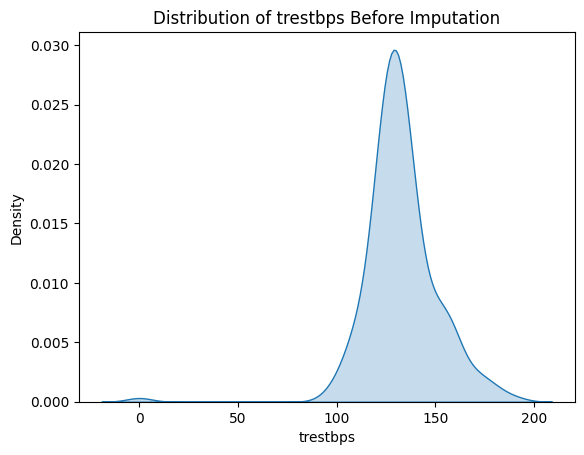

In [93]:
KDEplot('trestbps')

In [94]:
fill_with_median(heart, 'trestbps', ['cp','sex'])

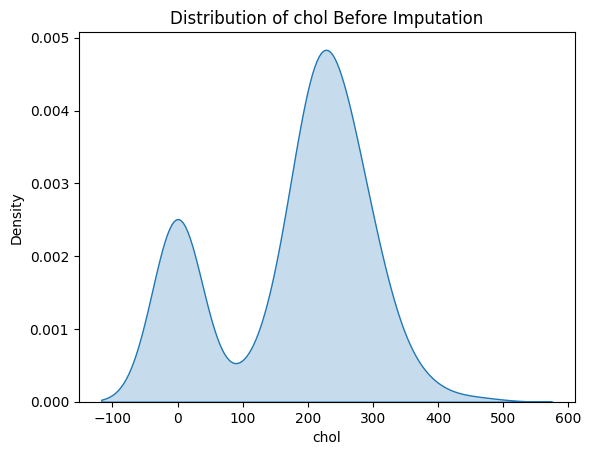

In [95]:
KDEplot('chol')

In [96]:
fill_with_median(heart, 'chol', ['sex', 'cp'])

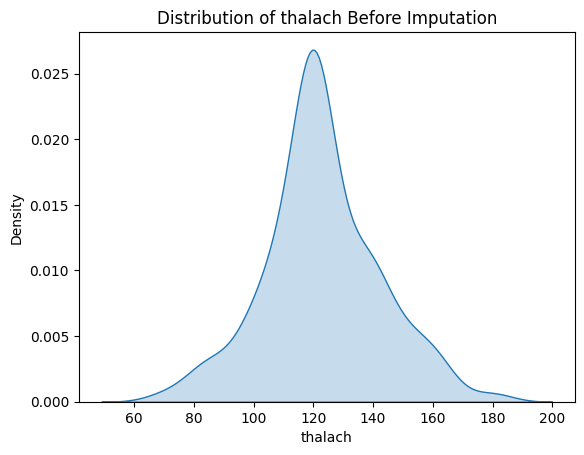

In [97]:
KDEplot('thalach')

In [98]:
fill_with_median(heart, 'thalach', ['cp','sex'])

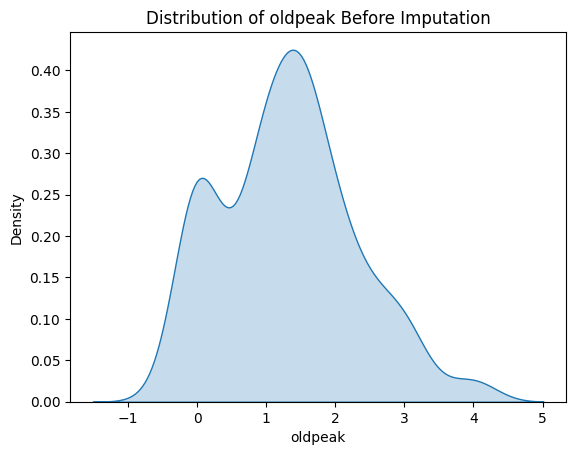

In [99]:
KDEplot('oldpeak')

In [100]:
fill_with_median(heart, 'oldpeak', ['cp','sex'])

In [101]:
#check for missing value in entire dataframe
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

In [65]:
heart.describe()

,age,trestbps,chol,thalach,oldpeak
count,200.000000,200.000000,199.000000,147.000000,144.000000
mean,59.350000,132.710000,178.517588,122.795918,1.320833
std,7.811697,18.478179,112.840365,21.990328,1.106236
min,35.000000,0.000000,0.000000,69.000000,-0.500000
25%,55.000000,125.000000,104.500000,109.000000,0.000000
50%,60.000000,132.000000,214.000000,120.000000,1.500000
75%,64.000000,140.000000,257.000000,140.000000,2.000000
max,77.000000,190.000000,458.000000,180.000000,4.000000


#### Outliers detection

In [102]:
# Specify the columns with potential outliers
columns_with_outliers = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Calculate the Z-scores (Z == (X−μ)/σ)
z_scores = np.abs(stats.zscore(heart[columns_with_outliers]))

# Find the rows with outliers
outlier_rows = heart[(z_scores >= 3).any(axis=1)]  # Select rows with at least one outlier in any column

# Display the data values of the outlier rows
print("Outlier Data Points:")
print(outlier_rows)

Outlier Data Points:
     age sex cp  trestbps   chol fbs restecg  thalach exang  oldpeak slope num
33    55   1  3       0.0    0.0   0       0    155.0     0      1.5     2   3
96    35   1  3     125.0  161.0   0       1    120.0     0      1.0     2   0
176   61   1  4     190.0  287.0   1       2    150.0     1      2.0     3   4
